In [3]:
# univariate data preparation
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

In [10]:
# slightly modified code from the M4 competition
def split_into_train_test(data, in_num, fh):
    """
    Splits the series into train and test sets. Each step takes multiple points as inputs
    :param data: an individual TS
    :param fh: number of out of sample points
    :param in_num: number of input points for the forecast
    :return:
    """
    train, test = data[:-fh], data[-(fh + in_num):]
    x_train, y_train = train[:-1], np.roll(train, -in_num)[:-in_num]
    x_test, y_test = test[:-1], np.roll(test, -in_num)[:-in_num]
#     x_test, y_test = train[-in_num:], np.roll(test, -in_num)[:-in_num]

    # reshape input to be [samples, time steps, features] (N-NF samples, 1 time step, 1 feature)
    x_train = np.reshape(x_train, (-1, 1))
    x_test = np.reshape(x_test, (-1, 1))
    temp_test = np.roll(x_test, -1)
    temp_train = np.roll(x_train, -1)
    for x in range(1, in_num):
        x_train = np.concatenate((x_train[:-1], temp_train[:-1]), 1)
        x_test = np.concatenate((x_test[:-1], temp_test[:-1]), 1)
        temp_test = np.roll(temp_test, -1)[:-1]
        temp_train = np.roll(temp_train, -1)[:-1]

    return x_train, y_train, x_test, y_test

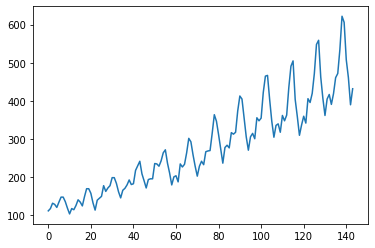

In [19]:
y = load_airline()
plt.plot(y.values)


In [28]:
y_train, y_test = temporal_train_test_split(y, test_size=36)
fh = np.arange(len(y_test)) + 1

In [29]:
y_train, y_test

(Period
 1949-01    112.0
 1949-02    118.0
 1949-03    132.0
 1949-04    129.0
 1949-05    121.0
            ...  
 1957-08    467.0
 1957-09    404.0
 1957-10    347.0
 1957-11    305.0
 1957-12    336.0
 Freq: M, Name: Number of airline passengers, Length: 108, dtype: float64,
 Period
 1958-01    340.0
 1958-02    318.0
 1958-03    362.0
 1958-04    348.0
 1958-05    363.0
 1958-06    435.0
 1958-07    491.0
 1958-08    505.0
 1958-09    404.0
 1958-10    359.0
 1958-11    310.0
 1958-12    337.0
 1959-01    360.0
 1959-02    342.0
 1959-03    406.0
 1959-04    396.0
 1959-05    420.0
 1959-06    472.0
 1959-07    548.0
 1959-08    559.0
 1959-09    463.0
 1959-10    407.0
 1959-11    362.0
 1959-12    405.0
 1960-01    417.0
 1960-02    391.0
 1960-03    419.0
 1960-04    461.0
 1960-05    472.0
 1960-06    535.0
 1960-07    622.0
 1960-08    606.0
 1960-09    508.0
 1960-10    461.0
 1960-11    390.0
 1960-12    432.0
 Freq: M, Name: Number of airline passengers, dtype: float64)

In [30]:
# here we split the time index, rather than the actual values, to show how we split the windows
feature_window, target_window, _, _ = split_into_train_test(y.index.values, 10, len(fh))

In [24]:
feature_window[:5, :]

array([[Period('1949-01', 'M'), Period('1949-02', 'M'),
        Period('1949-03', 'M'), Period('1949-04', 'M'),
        Period('1949-05', 'M'), Period('1949-06', 'M'),
        Period('1949-07', 'M'), Period('1949-08', 'M'),
        Period('1949-09', 'M'), Period('1949-10', 'M')],
       [Period('1949-02', 'M'), Period('1949-03', 'M'),
        Period('1949-04', 'M'), Period('1949-05', 'M'),
        Period('1949-06', 'M'), Period('1949-07', 'M'),
        Period('1949-08', 'M'), Period('1949-09', 'M'),
        Period('1949-10', 'M'), Period('1949-11', 'M')],
       [Period('1949-03', 'M'), Period('1949-04', 'M'),
        Period('1949-05', 'M'), Period('1949-06', 'M'),
        Period('1949-07', 'M'), Period('1949-08', 'M'),
        Period('1949-09', 'M'), Period('1949-10', 'M'),
        Period('1949-11', 'M'), Period('1949-12', 'M')],
       [Period('1949-04', 'M'), Period('1949-05', 'M'),
        Period('1949-06', 'M'), Period('1949-07', 'M'),
        Period('1949-08', 'M'), Period('1949-

In [25]:
target_window[:5]

array([Period('1949-11', 'M'), Period('1949-12', 'M'),
       Period('1950-01', 'M'), Period('1950-02', 'M'),
       Period('1950-03', 'M')], dtype=object)

In [32]:
# now we can split the actual values of the time series
x_train, y_train, x_test, y_test = split_into_train_test(y.values, 10, len(fh))
print(x_train.shape, y_train.shape)

(98, 10) (98,)


In [36]:
x_train

array([[112., 118., 132., 129., 121., 135., 148., 148., 136., 119.],
       [118., 132., 129., 121., 135., 148., 148., 136., 119., 104.],
       [132., 129., 121., 135., 148., 148., 136., 119., 104., 118.],
       [129., 121., 135., 148., 148., 136., 119., 104., 118., 115.],
       [121., 135., 148., 148., 136., 119., 104., 118., 115., 126.],
       [135., 148., 148., 136., 119., 104., 118., 115., 126., 141.],
       [148., 148., 136., 119., 104., 118., 115., 126., 141., 135.],
       [148., 136., 119., 104., 118., 115., 126., 141., 135., 125.],
       [136., 119., 104., 118., 115., 126., 141., 135., 125., 149.],
       [119., 104., 118., 115., 126., 141., 135., 125., 149., 170.],
       [104., 118., 115., 126., 141., 135., 125., 149., 170., 170.],
       [118., 115., 126., 141., 135., 125., 149., 170., 170., 158.],
       [115., 126., 141., 135., 125., 149., 170., 170., 158., 133.],
       [126., 141., 135., 125., 149., 170., 170., 158., 133., 114.],
       [141., 135., 125., 149., 17

In [37]:
y_train

array([104., 118., 115., 126., 141., 135., 125., 149., 170., 170., 158.,
       133., 114., 140., 145., 150., 178., 163., 172., 178., 199., 199.,
       184., 162., 146., 166., 171., 180., 193., 181., 183., 218., 230.,
       242., 209., 191., 172., 194., 196., 196., 236., 235., 229., 243.,
       264., 272., 237., 211., 180., 201., 204., 188., 235., 227., 234.,
       264., 302., 293., 259., 229., 203., 229., 242., 233., 267., 269.,
       270., 315., 364., 347., 312., 274., 237., 278., 284., 277., 317.,
       313., 318., 374., 413., 405., 355., 306., 271., 306., 315., 301.,
       356., 348., 355., 422., 465., 467., 404., 347., 305., 336.])

In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)


RandomForestRegressor()

In [39]:
x_test

array([[356., 348., 355., 422., 465., 467., 404., 347., 305., 336.],
       [348., 355., 422., 465., 467., 404., 347., 305., 336., 340.],
       [355., 422., 465., 467., 404., 347., 305., 336., 340., 318.],
       [422., 465., 467., 404., 347., 305., 336., 340., 318., 362.],
       [465., 467., 404., 347., 305., 336., 340., 318., 362., 348.],
       [467., 404., 347., 305., 336., 340., 318., 362., 348., 363.],
       [404., 347., 305., 336., 340., 318., 362., 348., 363., 435.],
       [347., 305., 336., 340., 318., 362., 348., 363., 435., 491.],
       [305., 336., 340., 318., 362., 348., 363., 435., 491., 505.],
       [336., 340., 318., 362., 348., 363., 435., 491., 505., 404.],
       [340., 318., 362., 348., 363., 435., 491., 505., 404., 359.],
       [318., 362., 348., 363., 435., 491., 505., 404., 359., 310.],
       [362., 348., 363., 435., 491., 505., 404., 359., 310., 337.],
       [348., 363., 435., 491., 505., 404., 359., 310., 337., 360.],
       [363., 435., 491., 505., 40

In [41]:
y_pred = model.predict(x_test)

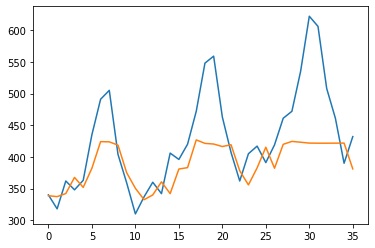

In [43]:
plt.plot(y_test)
plt.plot(y_pred)

In [47]:
from sktime.forecasting.model_selection import SlidingWindowSplitter

cv = SlidingWindowSplitter(window_length=10, start_with_window=True)
for input_window, output_window in cv.split(y.iloc[:20]):
    print(input_window, output_window)

[0 1 2 3 4 5 6 7 8 9] [10]
[ 1  2  3  4  5  6  7  8  9 10] [11]
[ 2  3  4  5  6  7  8  9 10 11] [12]
[ 3  4  5  6  7  8  9 10 11 12] [13]
[ 4  5  6  7  8  9 10 11 12 13] [14]
[ 5  6  7  8  9 10 11 12 13 14] [15]
[ 6  7  8  9 10 11 12 13 14 15] [16]
[ 7  8  9 10 11 12 13 14 15 16] [17]
[ 8  9 10 11 12 13 14 15 16 17] [18]
[ 9 10 11 12 13 14 15 16 17 18] [19]


In [50]:
from sktime.forecasting.model_selection import ExpandingWindowSplitter

cv = ExpandingWindowSplitter(start_with_window=True)
for input_window, output_window in cv.split(y.iloc[:20]):
    print(input_window, output_window)

[0 1 2 3 4 5 6 7 8 9] [10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11]
[ 0  1  2  3  4  5  6  7  8  9 10 11] [12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12] [13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] [14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19]


In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.compose import make_reduction

y_train, y_test = temporal_train_test_split(y, test_size=36)

regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = make_reduction(regressor, window_length=15, strategy="recursive")
print(forecaster)

RecursiveTabularRegressionForecaster(estimator=KNeighborsRegressor(n_neighbors=1),
                                     window_length=15)


0.14187443909112035

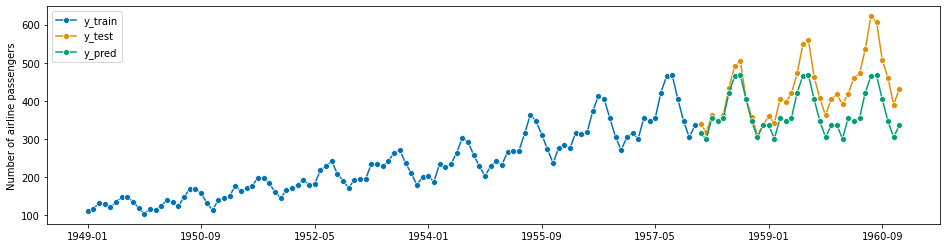

In [63]:
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)